# Main Library

In [2]:
# Reading Data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Make Preprocessing Data
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Building Model
import tensorflow as tf
import tensorflow.keras as k

# Loding Model
import pickle

In [3]:
path_train = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\cifar-10\train"
path_test = r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\cifar-10\test"
label_df = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\cifar-10\trainLabels.csv").values

train_data = []
test_data = []

label = []
class_name = ["airplane", "automobile", "bird","cat", "deer", "dog","frog","horse", "ship","truck"]

# Loading Training Data
for file in os.listdir(path_train):
    images = os.listdir(path_train + "\\" + file)
    for image in images:
        img = cv2.imread(path_train + "\\" + file + "\\" + image)
        img = cv2.resize(img, (32, 32))
        train_data.append(img)
        y = class_name.index(label_df[int(image.split(".")[0]) - 1][1])
        label.append(y)
#         for _ in range(2):
#             new_img = data_aug(tf.expand_dims(img, 0))[0]
#             train_data.append(new_img)
#             label.append(y)

print("--------- Done --------")
        
# Loading Testing Data
for file in os.listdir(path_test):
    images = os.listdir(path_test + "\\" + file)
    for image in images:
        img = cv2.imread(path_test + "\\" + file + "\\" + image)
        img = cv2.resize(img, (32, 32))
        test_data.append(img)

print("--------- Done --------")


print("Training Length images is ==> ",len(test_data))
print("Testing Length images is ==> ",len(train_data))

--------- Done --------
--------- Done --------
Training Length images is ==>  300000
Testing Length images is ==>  50000


In [4]:
# Training
train_data = np.array(train_data)
train_data = train_data.astype("float32")
train_data = train_data / 255.0

# Testing
test_data = np.array(test_data)
test_data = test_data.astype("float32")
test_data = test_data / 255.0

In [5]:
label = np.array(label)
label_img = to_categorical(label, 10)
label_img[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Shuffle & Split ==> Data

In [6]:
x_img, y_label = shuffle(train_data, label_img, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_label, train_size=0.7, random_state=42)

In [7]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((35000, 32, 32, 3), (35000, 10), (15000, 32, 32, 3), (15000, 10))

# Show Some Data


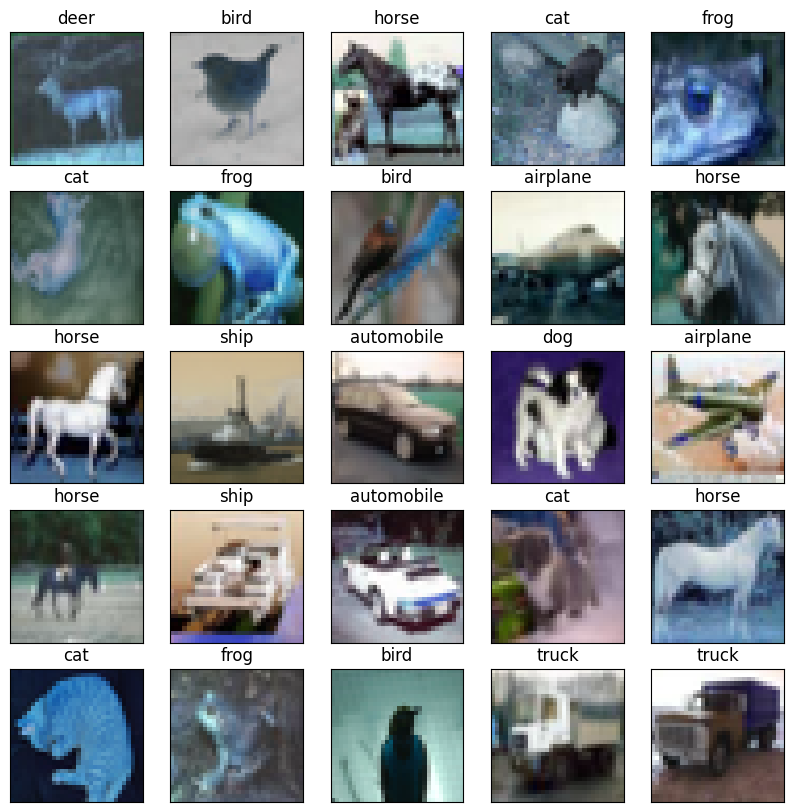

In [8]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

## ----------------------------------------------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------------------------------------------
## ----------------------------------------------------------------------------------------------------------------------------

# Building Model Pretraining model

In [31]:
model_B7 = k.applications.efficientnet_v2.EfficientNetV2M(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

In [32]:
model = k.models.Sequential()
# model.add(k.layers.UpSampling2D((2, 2)))
# model.add(k.layers.UpSampling2D((2, 2)))
# model.add(k.layers.UpSampling2D((2, 2)))
model.add(model_B7)
model.add(k.layers.Flatten())
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(128, activation="relu"))
model.add(k.layers.Dropout(0.5))
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(64, activation="relu"))
model.add(k.layers.Dropout(0.5))
model.add(k.layers.Dense(10, activation="softmax"))


model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), 
              metrics=["accuracy"])

In [34]:
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), validation_split=0.5)

  58/1094 [>.............................] - ETA: 29:00 - loss: 2.5936 - accuracy: 0.0970

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [ ]:
loss, accuracy = model_mask.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")